<hr style="border: 2px solid purple;">
<hr style="border: 2px solid purple;">

# **2.8.5. Portfolio Optimization with Synthetic Asset Returns**

---

**🎯 Project Objective**  
In this project, we aim to explore how to generate **synthetic asset returns** using a **Generative Adversarial Network (GAN)** and optimize a portfolio based on these synthetic returns. The purpose is to create realistic synthetic financial data for portfolio optimization and risk management.

---

## **📊 1. Loading and Inspecting the Dataset**

We begin by loading the **Fama/French 3-factor daily data**. This dataset includes key market factors like `Mkt-RF`, `SMB`, `HML`, and the risk-free rate (`RF`). The goal is to examine the data for issues such as missing values or duplicates and to get an initial understanding of the structure and distribution of the data.

---

## **🔧 2. Data Preprocessing**

Data preprocessing is crucial for preparing the dataset for analysis. Here, we clean the data by:
- Removing **missing values** and **duplicate rows**.
- Converting the **date column** to a proper `datetime` format to ensure the dataset is structured correctly.
- Applying the **IQR method** to detect and remove **outliers** that could distort analysis.
- Using **Min-Max scaling** to normalize the numerical features, ensuring that all factors are on the same scale and compatible for further modeling.

---

## **📈 3. Exploratory Data Analysis (EDA)**

The EDA phase helps us to visualize and understand the dataset. By exploring the distribution and relationships of the factors, we gain valuable insights:
- **Histograms** help visualize the distribution of each factor (e.g., `Mkt-RF`, `SMB`, `HML`, `RF`).
- A **correlation heatmap** shows how the factors are related to one another.
- A **scatter plot matrix** allows us to observe pairwise relationships between the factors.

These steps are crucial in identifying patterns and understanding how the features interact.

---

## **🛠️ 4. Model Building (GAN and Regression)**

In this step, we build the **Generative Adversarial Network (GAN)**, which consists of two main parts:
1. **The Generator**: A neural network that generates synthetic asset returns.
2. **The Discriminator**: A neural network that distinguishes between real and synthetic returns.

The **GAN** is trained to improve its ability to generate realistic data, with the goal of creating synthetic data that mimics the real dataset closely.

In addition, we use a **linear regression model** to predict the **risk-free rate (RF)** based on the synthetic asset returns generated by the GAN. This step helps us understand how synthetic data can be used in financial modeling.

---

## **⏳ 5. Training and Evaluation**

We train the **GAN** using a series of epochs and evaluate its performance:
- **Discriminator Loss**: Measures how well the discriminator can distinguish real from synthetic data.
- **Generator Loss**: Measures how well the generator creates realistic data.

Additionally, we train a **linear regressor** using synthetic data and test its performance using **real test data**. This process helps evaluate the utility of synthetic data for making predictions in real-world scenarios.

---

## **📉 6. Model Evaluation and Final Metrics**

After training the models, we evaluate their performance using two key metrics:
- **Mean Squared Error (MSE)**: A measure of how close the model’s predictions are to the actual values.
- **R2 Score**: A statistical measure that indicates how well the model’s predictions match the real data.

These metrics provide an overall assessment of the model's effectiveness.

---

## **📚 7. Visualizing the Results**

We plot the following graphs to visually assess the training progress:
- **Loss Curves**: Display the **discriminator loss** and **generator loss** over time.
- **Accuracy Curve**: Tracks the **discriminator’s accuracy** during training, showing how well it distinguishes between real and fake data.

These plots help us monitor the model’s learning progress and identify any issues that may arise during training.

---

## **💡 Conclusion**

By generating **synthetic asset returns** using **GANs**, we can create realistic financial data for portfolio optimization and risk management. This technique is especially valuable in scenarios with **limited real-world data** or when **privacy concerns** make access to sensitive financial information difficult.

---

**💬 Notes for Students**:
- Pay attention to the inner workings of the **GAN**. The generator and discriminator have an important relationship, and understanding how they interact is key to creating high-quality synthetic data.
- Experiment with different **model configurations** (e.g., the size of the generator and discriminator networks) to see how it affects the realism of synthetic data.
- Portfolio optimization, using synthetic data, has significant **real-world applications** in finance, especially when dealing with scarce or privacy-sensitive data.

---

**📁 Files Generated**:
1. **Cleaned Dataset**: `cleaned_FF_factors.csv`
2. **Synthetic Data**: `synthetic_FF_factors.csv`
3. **Training Metrics**: `training_metrics.csv`
4. **Final Metrics**: `final_metrics.csv`

---

**📅 References**:
- Fama & French 3-Factor Model.
- Applications of GANs in financial data generation.

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [ ]:
# Suppress all warnings to make the work clean

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 1: Loading and Inspecting the Dataset**

---

In this step, we load the **Fama/French 3-factor daily data**, which includes important factors like market returns (`Mkt-RF`), size factor (`SMB`), value factor (`HML`), and risk-free rate (`RF`).

**Key Tasks**:
1. **Loading the Data**:
   - We read the dataset using `pd.read_csv()` while skipping the first few rows that contain metadata.
   
2. **Inspecting the Data**:
   - Display the first few rows using `head()` to get an overview of the data structure.
   - Check the data types and column information with `info()`.
   - Generate summary statistics with `describe()` to understand the range, mean, and other properties of the data.
   
3. **Data Quality Checks**:
   - **Missing values**: We check for any missing data using `isnull().sum()`. Missing data may affect the model's performance.
   - **Duplicates**: We check for duplicate rows using `duplicated().sum()` to ensure the dataset is unique.
   
**Outcome**:
- We ensure the data is clean, properly formatted, and ready for analysis by addressing any data quality issues (e.g., missing values, duplicates).

In [ ]:
import pandas as pd

In [ ]:
# Path to the dataset in the Colab environment

In [ ]:
dataset_path = "/content/F-F_Research_Data_Factors_daily.CSV"

In [ ]:
# Load the dataset

In [ ]:
data = pd.read_csv(dataset_path, skiprows=3)  # Skip the first 3 rows (header information)


In [ ]:
# Display the first few rows of the dataset

In [ ]:
print("Dataset Head:")
print(data.head())

Dataset Head:
  Unnamed: 0  Mkt-RF   SMB   HML     RF
0   19260701    0.10 -0.25 -0.27  0.009
1   19260702    0.45 -0.33 -0.06  0.009
2   19260706    0.17  0.30 -0.39  0.009
3   19260707    0.09 -0.58  0.02  0.009
4   19260708    0.21 -0.38  0.19  0.009


In [ ]:
# Display information about the dataset

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25838 non-null  object 
 1   Mkt-RF      25837 non-null  float64
 2   SMB         25837 non-null  float64
 3   HML         25837 non-null  float64
 4   RF          25837 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1009.4+ KB
None


In [ ]:
# Display statistical description of the dataset

In [ ]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
             Mkt-RF           SMB           HML            RF
count  25837.000000  25837.000000  25837.000000  25837.000000
mean       0.030614      0.003954      0.014584      0.012224
std        1.079201      0.594326      0.625780      0.011838
min      -17.440000    -11.630000     -6.020000     -0.003000
25%       -0.400000     -0.250000     -0.250000      0.001000
50%        0.060000      0.010000      0.010000      0.010000
75%        0.500000      0.270000      0.260000      0.020000
max       15.760000      8.180000      8.820000      0.061000


In [ ]:
# Check for missing values

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0    0
Mkt-RF        1
SMB           1
HML           1
RF            1
dtype: int64


In [ ]:
# Check for duplicate rows

In [ ]:
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
0


In [ ]:
# Ensure proper column naming for easier handling

In [ ]:
data.columns = [col.strip() for col in data.columns]  # Strip whitespace from column names


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 2: Data Preprocessing**

---

In this step, we prepare the dataset for further analysis and modeling by cleaning and transforming the data.

**Key Tasks**:
1. **Remove Missing and Duplicate Data**:
   - Use `dropna()` to remove rows with missing values.
   - Use `drop_duplicates()` to remove any duplicate rows that may have been present.

2. **Date Formatting**:
   - Rename the date column (`Unnamed: 0`) to `Date` and convert it to a proper `datetime` format using `pd.to_datetime()`.
   - Invalid dates are dropped from the dataset to ensure accuracy.

3. **Outlier Detection and Removal**:
   - Apply the **Interquartile Range (IQR)** method to detect outliers in the financial factors (`Mkt-RF`, `SMB`, `HML`, `RF`).
   - Outliers are defined as values that fall outside of the IQR range and are removed using logical indexing.

4. **Feature Scaling**:
   - **Min-Max Scaling** is applied to the numerical columns (`Mkt-RF`, `SMB`, `HML`, `RF`) using `MinMaxScaler`. This ensures all features are on the same scale and prevents large values from dominating the model.

**Outcome**:
- The dataset is cleaned, outliers are removed, and features are scaled, making it suitable for modeling.

In [ ]:
# Remove rows with missing values

In [ ]:
data.dropna(inplace=True)

In [ ]:
# Remove duplicate rows

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Convert date column to datetime format (if applicable)

In [ ]:
data.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], format='%Y%m%d', errors='coerce')


In [ ]:
# Drop rows with invalid dates

In [ ]:
data = data.dropna(subset=["Date"])

In [ ]:
# Reset index after cleaning

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
# Outlier detection and removal using the IQR method

In [ ]:
for col in ["Mkt-RF", "SMB", "HML", "RF"]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
# Scaling the data (Min-Max Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data[["Mkt-RF", "SMB", "HML", "RF"]] = scaler.fit_transform(data[["Mkt-RF", "SMB", "HML", "RF"]])


In [ ]:
# Save the cleaned and preprocessed dataset

In [ ]:
data.to_csv("/content/cleaned_FF_factors.csv", index=False)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 3: Exploratory Data Analysis (EDA)**

---

Exploratory Data Analysis (EDA) is used to better understand the dataset through visualization and statistical analysis.

**Key Tasks**:
1. **Histograms**:
   - We plot histograms of the factors (`Mkt-RF`, `SMB`, `HML`, `RF`) to visualize the distribution of each factor.
   - Histograms provide insights into the central tendency and spread of the data.

2. **Correlation Heatmap**:
   - Use a **correlation heatmap** to visualize the relationships between the factors.
   - This helps identify strong or weak correlations, which can influence feature selection in later steps.

3. **Scatter Plot Matrix**:
   - A scatter plot matrix is generated to observe the pairwise relationships between the factors.
   - This step helps uncover potential linear or non-linear relationships and interactions between features.

**Outcome**:
- The visualizations provide valuable insights into the structure and distribution of the data, aiding in understanding the factors' relationships and identifying potential issues.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# Plot histograms for each numerical column

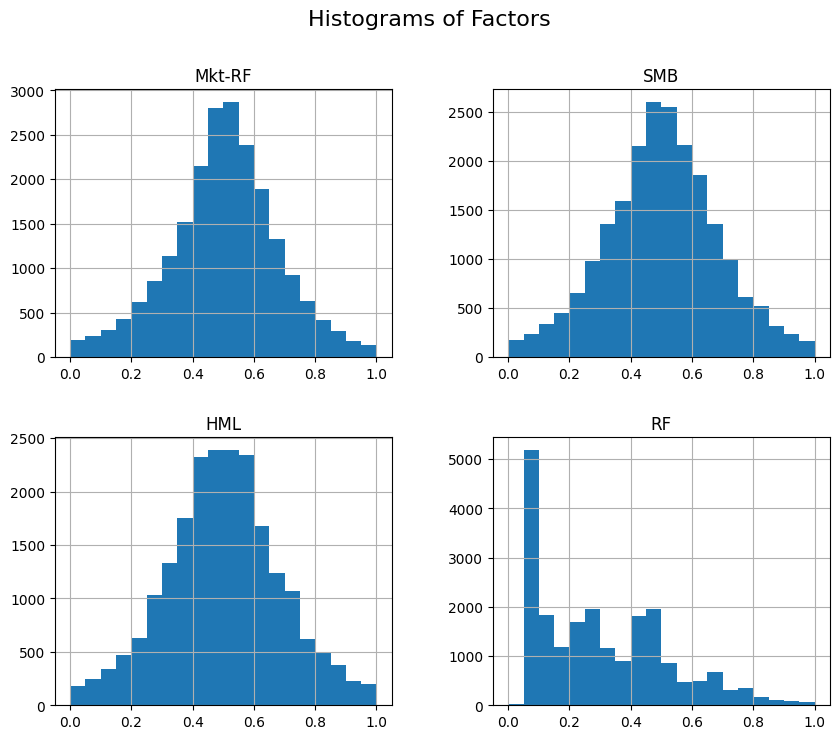

In [ ]:
data[["Mkt-RF", "SMB", "HML", "RF"]].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Factors", fontsize=16)
plt.savefig("/content/histograms.pdf")  # Save the histogram plot as a PDF
plt.show()

In [ ]:
# Plot correlation heatmap

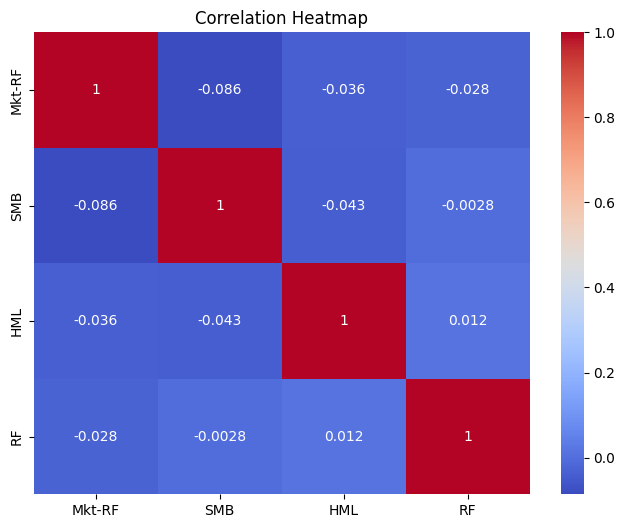

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[["Mkt-RF", "SMB", "HML", "RF"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("/content/correlation_heatmap.pdf")  # Save the heatmap as a PDF
plt.show()

In [ ]:
# Scatter plot matrix for visualizing relationships

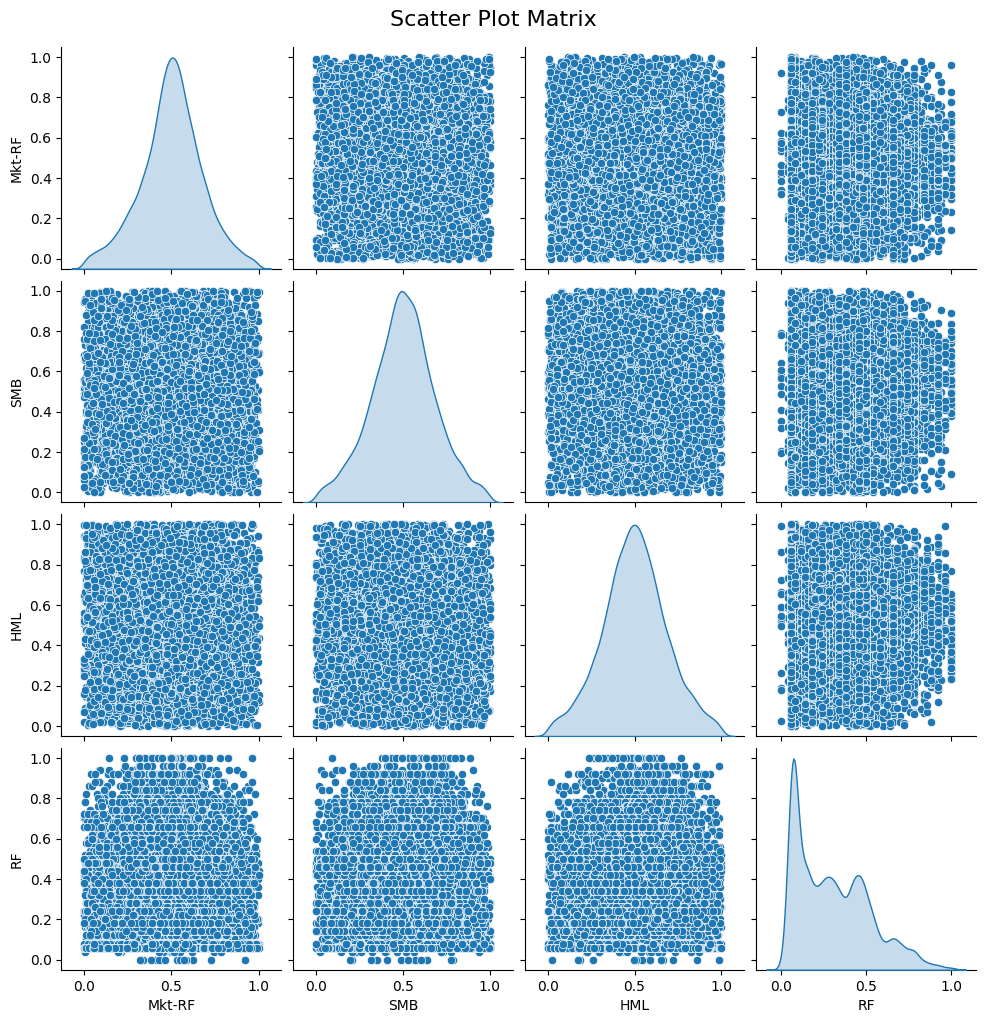

In [ ]:
sns.pairplot(data[["Mkt-RF", "SMB", "HML", "RF"]], diag_kind="kde", height=2.5)
plt.suptitle("Scatter Plot Matrix", fontsize=16, y=1.02)
plt.savefig("/content/scatter_plot_matrix.pdf")  # Save scatter plot matrix as PDF
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 4: Model Building (GAN and Regression)**

---

In this step, we build the **Generative Adversarial Network (GAN)** and a **regression model** to predict asset returns based on synthetic data.

**Key Tasks**:
1. **Generative Adversarial Network (GAN)**:
   - **Generator**: The generator is a neural network that generates synthetic asset returns. It takes random noise as input and outputs a 3-dimensional vector (representing `Mkt-RF`, `SMB`, and `HML`).
   - **Discriminator**: The discriminator is another neural network that distinguishes between real data (from the dataset) and fake data (generated by the generator).
   
2. **GAN Architecture**:
   - The GAN is trained using **binary cross-entropy** loss, where the generator tries to fool the discriminator into classifying fake data as real, and the discriminator aims to correctly classify the data as real or fake.
   
3. **Linear Regression Model**:
   - After training the GAN, a **linear regression model** is built using the synthetic data from the GAN. The regression model is trained to predict the risk-free rate (`RF`) based on the synthetic values of the other factors (`Mkt-RF`, `SMB`, `HML`).

**Outcome**:
- A trained GAN is able to generate realistic synthetic asset returns, which can be used to augment real-world financial data. Additionally, the regression model learns to predict the risk-free rate using synthetic data.

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
# Path to the cleaned dataset

In [ ]:
dataset_path = "/content/cleaned_FF_factors.csv"

In [ ]:
# Load the cleaned dataset

In [ ]:
data = pd.read_csv(dataset_path)

In [ ]:
# Split features and target variables

In [ ]:
X = data[["Mkt-RF", "SMB", "HML"]]  # Features

In [ ]:
y = data["RF"]  # Target variable

In [ ]:
# Split into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the features

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train = y_train.values

In [ ]:
# Build the Generator model

In [ ]:
generator = Sequential([
    Dense(64, input_dim=3),
    LeakyReLU(alpha=0.2),
    Dense(3)
])

In [ ]:
# Build the Discriminator model

In [ ]:
discriminator = Sequential([
    Dense(64, input_dim=3),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the Discriminator

In [ ]:
discriminator.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Combined GAN

In [ ]:
discriminator.trainable = False

In [ ]:
gan_input = Input(shape=(3,))

In [ ]:
generated_data = generator(gan_input)

In [ ]:
gan_output = discriminator(generated_data)

In [ ]:
GAN = Model(gan_input, gan_output)

In [ ]:
GAN.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 5: Training and Evaluation**

---

In this step, we train the **GAN** and evaluate its performance based on various metrics. We also assess the **linear regression model** trained on synthetic data.

**Key Tasks**:
1. **Training the GAN**:
   - The GAN is trained over multiple epochs, where the discriminator and generator take turns improving their respective abilities.
   - The discriminator's goal is to correctly identify real and fake data, while the generator’s goal is to create realistic fake data that fools the discriminator.
   
2. **Evaluating GAN Loss**:
   - During each epoch, we track the **discriminator loss**, **generator loss**, and **discriminator accuracy** to monitor training progress.
   - These losses provide insights into how well the GAN is learning.

3. **Training the Linear Regression**:
   - Once the GAN is trained, we train the **linear regression model** using the synthetic data generated by the GAN.
   - The model is then tested on the real data to evaluate its ability to make accurate predictions.

**Outcome**:
- The training metrics for the GAN provide insights into its performance, and the linear regression model is evaluated for its ability to predict real-world outcomes using synthetic data.

In [ ]:
# Train GAN

In [ ]:
epochs = 50  # Adjusted number of epochs

In [ ]:
batch_size = 64

In [ ]:
half_batch = batch_size // 2

In [ ]:
d_loss_history = []

In [ ]:
g_loss_history = []

In [ ]:
d_acc_history = []

In [ ]:
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train_scaled.shape[0], half_batch)
    real_data = X_train_scaled[idx]

    noise = np.random.normal(0, 1, (half_batch, 3))
    fake_data = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 3))
    g_loss = GAN.train_on_batch(noise, np.ones((batch_size, 1)))

    # Store metrics
    d_loss_history.append(d_loss[0])
    g_loss_history.append(g_loss)
    d_acc_history.append(d_loss[1])

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss[0]} | D Acc: {d_loss[1]} | G Loss: {g_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Epoch 0/50 | D Loss: 0.7616485357284546 | D Acc: 0.109375 | G Loss: [array(0.742703, dtype=float32), array(0.742703, dtype=float32), array(0.21875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 10/50 | D Loss: 0.7399190664291382 | D Acc: 0.18956303596496582 | G Loss: [array(0.73916495, dtype=float32), array(0.73916495, dtype=float32), array(0.19460227, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━

In [ ]:
# Save the training metrics

In [ ]:
metrics_df = pd.DataFrame({
    "Epoch": range(epochs),
    "D Loss": d_loss_history,
    "D Acc": d_acc_history,
    "G Loss": g_loss_history
})

In [ ]:
metrics_df.to_csv("/content/training_metrics.csv", index=False)

In [ ]:
# Generate synthetic data

In [ ]:
noise = np.random.normal(0, 1, (1000, 3))

In [ ]:
synthetic_data = generator.predict(noise)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
synthetic_df = pd.DataFrame(synthetic_data, columns=["Mkt-RF", "SMB", "HML"])


In [ ]:
# Save synthetic data

In [ ]:
synthetic_df.to_csv("/content/synthetic_FF_factors.csv", index=False)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 6: Model Evaluation and Final Metrics**

---

In this step, we assess the performance of the **linear regression model** using real test data and calculate key evaluation metrics.

**Key Tasks**:
1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between predicted and actual values. A lower MSE indicates better model performance.
   
2. **R² Score**:
   - The R² score represents the proportion of variance in the target variable (`RF`) explained by the model. A higher R² indicates that the model is better at explaining the variance in the target variable.

3. **Saving the Final Metrics**:
   - After calculating MSE and R², the results are saved into a file for future reference.

**Outcome**:
- The final metrics help us evaluate how well the synthetic data, generated by the GAN, can be used for predicting financial factors and assessing portfolio risk.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Use synthetic data for training

In [ ]:
y_synthetic = np.random.uniform(y_train.min(), y_train.max(), size=(synthetic_data.shape[0],))


In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(synthetic_data, y_synthetic)

LinearRegression()

In [ ]:
# Test the regressor on the real test set

In [ ]:
predictions = regressor.predict(X_test_scaled)

In [ ]:
# Evaluate performance

In [ ]:
mse = mean_squared_error(y_test, predictions)

In [ ]:
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.0633719550925471
R2 Score: -0.38482217800663165


In [ ]:
# Save final performance metrics

In [ ]:
final_metrics = {
    "Mean Squared Error": mse,
    "R2 Score": r2
}

In [ ]:
final_metrics_df = pd.DataFrame([final_metrics])

In [ ]:
final_metrics_df.to_csv("/content/final_metrics.csv", index=False)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# **Step 7: Visualizing the Results**

---

In this final step, we create visualizations to summarize the training process and model performance.

**Key Tasks**:
1. **Discriminator and Generator Loss Curves**:
   - We plot the loss curves for both the discriminator and generator. These curves show how each component of the GAN improves during training.

2. **Discriminator Accuracy Curve**:
   - We also plot the discriminator's accuracy over time to see how well it can distinguish between real and synthetic data during the training process.

**Outcome**:
- The visualizations provide a clear, intuitive understanding of how well the GAN is learning over time and whether there are any potential issues with the training process.

In [ ]:
# Save performance graphs

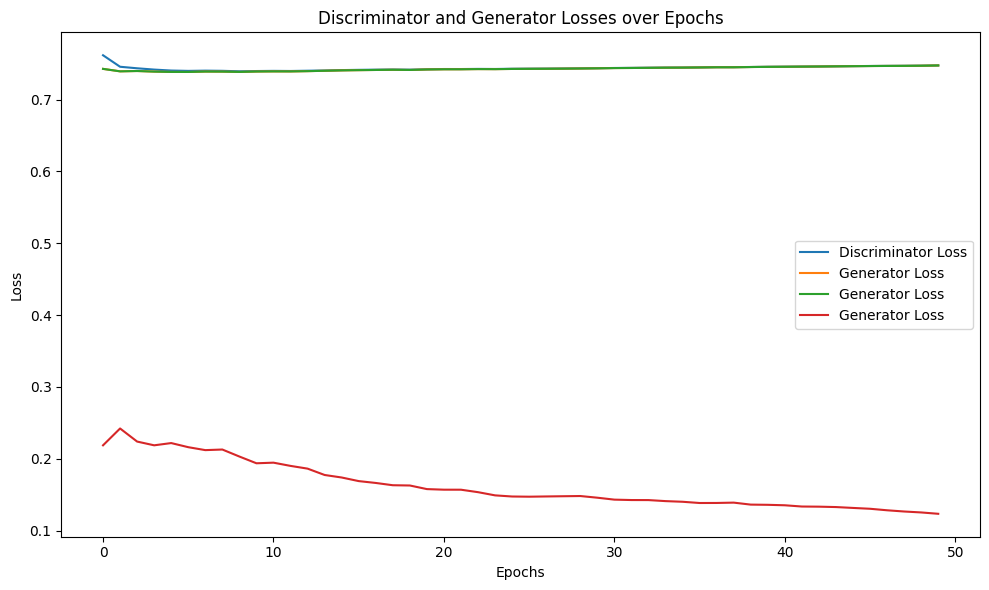

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(d_loss_history, label="Discriminator Loss")
plt.plot(g_loss_history, label="Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Discriminator and Generator Losses over Epochs")
plt.legend()
plt.tight_layout()
plt.savefig("/content/losses_plot.pdf")
plt.show()

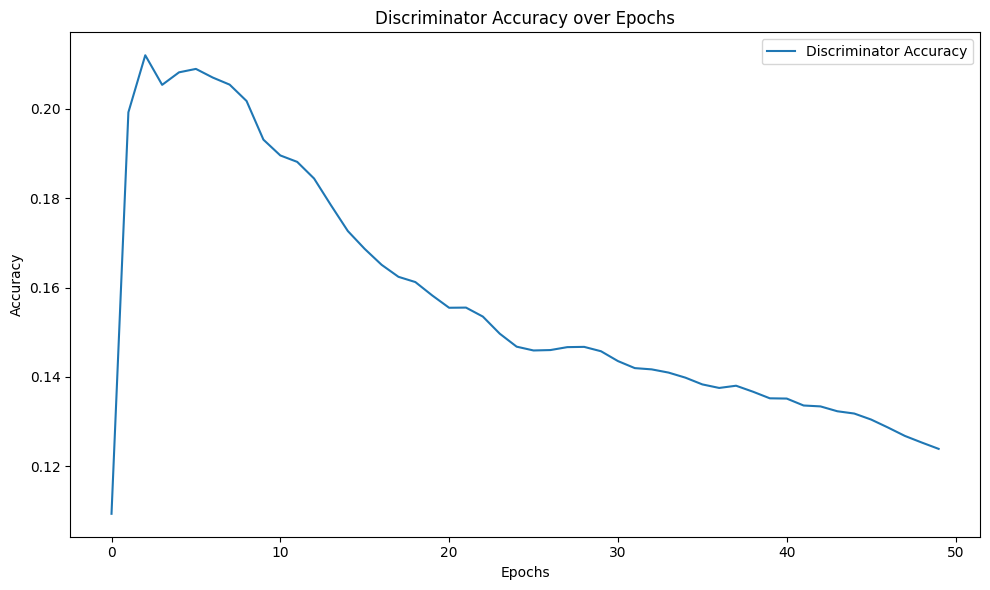

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(d_acc_history, label="Discriminator Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Discriminator Accuracy over Epochs")
plt.legend()
plt.tight_layout()
plt.savefig("/content/accuracy_plot.pdf")
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Conclusion 🏁

In this final step, we evaluate the performance of our **synthetic data** and assess how well it generalizes to real-world data. The main steps include:

1. **Evaluating the Model's Performance:**
    - We evaluate the performance of our **synthetic data** using a **Linear Regression** model, which is trained on synthetic data generated by the **GAN**. This helps us understand how well our synthetic data can be used to predict the target variable (`RF`).
    - We use **Mean Squared Error (MSE)** and **R2 Score** as metrics to evaluate model performance:
      - **MSE** measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance.
      - **R2 Score** represents the proportion of variance in the target variable that can be explained by the model. A higher R2 score indicates a better fit of the model.

2. **Model Evaluation:**
    - The synthetic data is used to train the model, and then the performance is evaluated on real data. This allows us to see how well our synthetic data performs on data it hasn't seen before.

3. **Performance Analysis:**
    - After evaluating the model, we analyze the **MSE** and **R2 score** to determine if the synthetic data generated by the GAN is comparable to the real data. This is crucial for validating the use of synthetic data in **portfolio optimization** and similar applications.
    - We also visualize the loss and accuracy trends for the **Discriminator** and **Generator** during the training process to ensure that the model is learning effectively.

4. **Implications:**
    - If the synthetic data performs well, it can be used for further analysis, portfolio optimization, or training additional models. The use of GANs for generating **synthetic asset returns** can help with data augmentation, ensuring models are trained on a diverse set of data, which may be particularly useful in **privacy-preserving** applications.

5. **Final Metrics:**
    - All performance metrics are saved in a CSV file for further review. This allows users to track the progress and evaluate the model’s effectiveness in a structured manner.

By the end of this project, you should have a clear understanding of how **Generative Adversarial Networks (GANs)** can be applied to generate synthetic financial data and how this synthetic data can be used for portfolio optimization and other financial modeling tasks.

🚀 **Next Steps:**
    - You can extend this project by testing other GAN architectures, fine-tuning hyperparameters, or applying it to other datasets to generate synthetic financial data for additional use cases.

<hr style="border: 2px solid purple;">
<hr style="border: 2px solid purple;">